# **DESAFIO 3 G2** 
# **Dataset Properati - Modelado de datos - Preliminar.**
---

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

Vacio

$\hspace{.5cm}$[Observaciones generales](#section_og)
  
$\hspace{.9cm}$[Dimension de propiedades](#section_tsv_gdp)

Vacio

$\hspace{.5cm}$[Expresiones regulares](#section_re)

$\hspace{.9cm}$[Principios generales](#section_re_pg)

Vacio

$\hspace{.5cm}$[Borrado de registros duplicados](#section_drd)

$\hspace{.5cm}$[Borrado de registros sin información completa](#section_drii)

Visualizaciones basicas

$\hspace{.5cm}$[Venta departamentos CABA](#section_v_1)

$\hspace{.5cm}$[Venta casas CABA, Buenos Aires e Interior](#section_v_4)


---

<a id="section_intro"></a> 
## Intro

[volver a TOC](#section_toc)

Carga de DataFrame y exploracion inicial

In [1]:
import pandas as pd
import numpy as np
import re
import random

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_location = 'https://github.com/DHDSDesafios/DH_DS_desafio_2_properati/raw/master/data/properatid2caba.zip'
data = pd.read_csv(data_location, compression='zip', encoding="utf-8")

In [4]:
pd.set_option('display.max_colwidth', 1500)
pd.set_option('display.max_rows', 400)

<a id="section_og"></a> 
### Observaciones Generales

[volver a TOC](#section_toc)

In [5]:
data.sample(10)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,balcon,terraza,jardin,lavadero
28680,119140,apartment,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,NaN,NaN,NaN,160800.0,USD,...,60.0,47.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
23922,96446,apartment,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,NaN,NaN,NaN,1700000.0,USD,...,490.0,440.0,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN
9423,39340,apartment,|Argentina|Capital Federal|,Argentina,Capital Federal,"-34.6157496,-58.4644798",-34.615750,-58.464480,66000.0,USD,...,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,9242,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,NaN,NaN,NaN,280000.0,USD,...,97.0,73.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4060,19479,apartment,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,"-34.6180146,-58.4707774",-34.618015,-58.470777,1700000.0,ARS,...,48.0,45.0,1.0,NaN,1.0,NaN,BALCON,1.0,NaN,NaN
3670,17795,apartment,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.587953,-58.414446",-34.587953,-58.414446,214300.0,USD,...,72.0,72.0,NaN,1.0,1.0,NaN,BALCON,1.0,NaN,NaN
4145,19702,apartment,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,"-34.5954153358,-58.4042479307",-34.595415,-58.404248,318000.0,USD,...,118.0,110.0,1.0,NaN,NaN,NaN,balcon,NaN,NaN,1.0
4471,20947,apartment,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,"-34.5855804,-58.4232627",-34.585580,-58.423263,398000.0,USD,...,88.0,82.0,1.0,1.0,1.0,NaN,1,1.0,NaN,NaN
20277,81201,apartment,|Argentina|Capital Federal|Floresta|,Argentina,Capital Federal,"-34.6202202,-58.5042502",-34.620220,-58.504250,220000.0,USD,...,138.0,65.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
28620,118972,apartment,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,"-34.593977931,-58.4409604447",-34.593978,-58.440960,189000.0,USD,...,72.0,62.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
data.columns

Index(['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name', 'geonames_id',
       'price_usd_per_m2', 'price_per_m2', 'surface_total_in_m2',
       'surface_covered_in_m2', 'cochera', 'piscina', 'parrilla', 'baulera',
       'balcon', 'terraza', 'jardin', 'lavadero'],
      dtype='object')

In [7]:
data.shape

(29380, 36)

DEPURACION DE NULOS

In [8]:
caba_place_name_mask = data.place_name != 'Capital Federal'
surface_total_mask_notnull = data.surface_total_in_m2.notnull()
price_per_m2_mask_notnull = data.price_per_m2.notnull()
price_usd_per_m2_mask_notnull = data.price_usd_per_m2.notnull()

In [9]:
#data = data.loc[caba_place_name_mask & surface_covered_mask_notnull & price_per_m2_mask_notnull]
data = data.loc[caba_place_name_mask & surface_total_mask_notnull & price_usd_per_m2_mask_notnull]

In [10]:
# crear variables dummies
property_type_dummies = pd.get_dummies(data.property_type, prefix='prop_type')

data = pd.concat([data, property_type_dummies], axis=1)

# imprimimos 5 filas cualquieras
data.sample(5)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,parrilla,baulera,balcon,terraza,jardin,lavadero,prop_type_PH,prop_type_apartment,prop_type_house,prop_type_store
26046,109732,PH,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,"-34.6048306,-58.4610064",-34.604831,-58.461006,85000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
27261,113445,PH,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,"-34.541728,-58.4772598",-34.541728,-58.477260,148000.0,USD,...,1.0,NaN,NaN,1.0,NaN,1.0,1,0,0,0
27799,116588,apartment,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,NaN,NaN,NaN,236500.0,USD,...,NaN,NaN,NaN,1.0,NaN,NaN,0,1,0,0
16140,64500,apartment,|Argentina|Capital Federal|Saavedra|,Argentina,Capital Federal,NaN,NaN,NaN,87000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
24094,97012,apartment,|Argentina|Capital Federal|Villa Crespo|,Argentina,Capital Federal,NaN,NaN,NaN,102900.0,USD,...,1.0,NaN,NaN,NaN,NaN,NaN,0,1,0,0


In [11]:
# crear variables dummies
place_name_dummies = pd.get_dummies(data.place_name, prefix='pn')

data = pd.concat([data, place_name_dummies], axis=1)

# imprimimos 5 filas cualquieras
data.sample(5)

,Id_caso,property_type,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
19136,77172,apartment,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,"-34.6237951,-58.4284858",-34.623795,-58.428486,115000.0,USD,...,0,0,0,0,0,0,0,0,0,0
26049,109735,apartment,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,"-34.6228605,-58.4624906",-34.622861,-58.462491,80000.0,USD,...,0,0,0,0,0,0,0,0,0,0
1043,6512,apartment,|Argentina|Capital Federal|Balvanera|,Argentina,Capital Federal,"-34.6151514,-58.3946932",-34.615151,-58.394693,141000.0,USD,...,0,0,0,0,0,0,0,0,0,0
16334,65330,store,|Argentina|Capital Federal|San Telmo|,Argentina,Capital Federal,"-34.6231721956,-58.3726241275",-34.623172,-58.372624,330000.0,USD,...,0,0,0,0,0,0,0,0,0,0
16330,65307,apartment,|Argentina|Capital Federal|Flores|,Argentina,Capital Federal,NaN,NaN,NaN,130000.0,USD,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(data.cochera.apply(lambda x: type(x)).value_counts())
print(data.piscina.apply(lambda x: type(x)).value_counts())
print(data.parrilla.apply(lambda x: type(x)).value_counts())
print(data.balcon.apply(lambda x: type(x)).value_counts())
print(data.terraza.apply(lambda x: type(x)).value_counts())
print(data.lavadero.apply(lambda x: type(x)).value_counts())
print(data.lavadero.apply(lambda x: type(x)).value_counts())
print(data.surface_covered_in_m2.apply(lambda x: type(x)).value_counts())
print(data.surface_total_in_m2.apply(lambda x: type(x)).value_counts())

<class 'float'>    21895
Name: cochera, dtype: int64
<class 'float'>    21895
Name: piscina, dtype: int64
<class 'float'>    21895
Name: parrilla, dtype: int64
<class 'float'>    15039
<class 'str'>       6856
Name: balcon, dtype: int64
<class 'float'>    21895
Name: terraza, dtype: int64
<class 'float'>    21895
Name: lavadero, dtype: int64
<class 'float'>    21895
Name: lavadero, dtype: int64
<class 'float'>    21895
Name: surface_covered_in_m2, dtype: int64
<class 'float'>    21895
Name: surface_total_in_m2, dtype: int64


In [13]:
data.loc[data.cochera.isnull(), 'cochera'] = 0
data.cochera.astype('uint8')

data.loc[data.piscina.isnull(), 'piscina'] = 0
data.piscina.astype('uint8')

data.loc[data.lavadero.isnull(), 'lavadero'] = 0
data.lavadero.astype('uint8')

data.loc[data.parrilla.isnull(), 'parrilla'] = 0
data.parrilla.astype('uint8')

data.loc[data.terraza.isnull(), 'terraza'] = 0
data.terraza.astype('uint8')

data.loc[data.jardin.isnull(), 'jardin'] = 0
data.jardin.astype('uint8')

data.loc[data.balcon == 'Balcon', 'balcon'] = 1
data.loc[data.balcon == 'BALCON', 'balcon'] = 1
data.loc[data.balcon == 'balcon', 'balcon'] = 1
data.loc[data.balcon.isnull(), 'balcon'] = 0
data.balcon.astype('uint8')

data.loc[data.baulera.isnull(), 'baulera'] = 0
data.baulera.astype('uint8')

0        0
1        0
3        0
4        0
5        0
        ..
29375    0
29376    0
29377    1
29378    0
29379    0
Name: baulera, Length: 21895, dtype: uint8

In [14]:
erase_columns = ['Id_caso', 'property_type', 'place_with_parent_names', 'country_name',
       'state_name', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'floor', 'rooms',
       'expenses', 'description', 'title', 'Pais', 'Zona', 'Partido_barrio',
       'Localidad', 'Obs_localidad', 'place_name']

In [15]:
datad2 = data.drop(data[erase_columns], axis=1)

In [16]:
datad2.columns

Index(['price_aprox_usd', 'geonames_id', 'price_usd_per_m2', 'price_per_m2',
       'surface_total_in_m2', 'surface_covered_in_m2', 'cochera', 'piscina',
       'parrilla', 'baulera', 'balcon', 'terraza', 'jardin', 'lavadero',
       'prop_type_PH', 'prop_type_apartment', 'prop_type_house',
       'prop_type_store', 'pn_Abasto', 'pn_Agronomía', 'pn_Almagro',
       'pn_Balvanera', 'pn_Barracas', 'pn_Barrio Norte', 'pn_Belgrano',
       'pn_Boca', 'pn_Boedo', 'pn_Caballito', 'pn_Catalinas',
       'pn_Centro / Microcentro', 'pn_Chacarita', 'pn_Coghlan',
       'pn_Colegiales', 'pn_Congreso', 'pn_Constitución', 'pn_Flores',
       'pn_Floresta', 'pn_Las Cañitas', 'pn_Liniers', 'pn_Mataderos',
       'pn_Monserrat', 'pn_Monte Castro', 'pn_Nuñez', 'pn_Once', 'pn_Palermo',
       'pn_Palermo Chico', 'pn_Palermo Hollywood', 'pn_Palermo Soho',
       'pn_Palermo Viejo', 'pn_Parque Avellaneda', 'pn_Parque Centenario',
       'pn_Parque Chacabuco', 'pn_Parque Chas', 'pn_Parque Patricios',
     

In [17]:
datad2.sample(5)

,price_aprox_usd,geonames_id,price_usd_per_m2,price_per_m2,surface_total_in_m2,surface_covered_in_m2,cochera,piscina,parrilla,baulera,...,pn_Villa Lugano,pn_Villa Luro,pn_Villa Ortuzar,pn_Villa Pueyrredón,pn_Villa Real,pn_Villa Riachuelo,pn_Villa Santa Rita,pn_Villa Soldati,pn_Villa Urquiza,pn_Villa del Parque
17390,169000.0,3430234.0,3129.63,3380.00,54.0,50.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2380,479000.0,3435257.0,870.91,1108.80,550.0,432.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
23413,182899.0,6693228.0,2151.75,2438.65,85.0,75.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
26785,97000.0,3430570.0,2063.83,2365.85,47.0,41.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
15261,650000.0,19693393.0,2901.79,3186.27,224.0,204.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#data.cochera.value_counts()
datad2.loc[:, ['price_aprox_usd', 'price_usd_per_m2', 'surface_covered_in_m2', 'surface_total_in_m2', 'cochera', 'price_per_m2']].corr()

,price_aprox_usd,price_usd_per_m2,surface_covered_in_m2,surface_total_in_m2,cochera,price_per_m2
price_aprox_usd,1.000000,0.302166,0.533039,0.688091,0.123152,0.179876
price_usd_per_m2,0.302166,1.000000,-0.045287,-0.013623,-0.006962,0.534345
surface_covered_in_m2,0.533039,-0.045287,1.000000,0.955764,0.047292,-0.035868
surface_total_in_m2,0.688091,-0.013623,0.955764,1.000000,0.001979,-0.005299
cochera,0.123152,-0.006962,0.047292,0.001979,1.000000,0.002630
price_per_m2,0.179876,0.534345,-0.035868,-0.005299,0.002630,1.000000


In [19]:
#f, ax = plt.subplots(figsize=(7, 5))
#ax.heatmap(data.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap=sns.diverging_palette(20, 220, n=200), square=True)

#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(8, 8))
#    ax = sns.heatmap(data.corr(), vmax=.3, annot=True, square=True, cmap="YlGnBu")

In [20]:
feature_cols = ['cochera', 'prop_type_PH', 'prop_type_apartment', 'prop_type_house','prop_type_store', 'pn_Abasto', 'pn_Agronomía', 'pn_Almagro',
       'pn_Balvanera', 'pn_Barracas', 'pn_Barrio Norte', 'pn_Belgrano',
       'pn_Boca', 'pn_Boedo', 'pn_Caballito', 'pn_Catalinas',
       'pn_Centro / Microcentro', 'pn_Chacarita', 'pn_Coghlan',
       'pn_Colegiales', 'pn_Congreso', 'pn_Constitución', 'pn_Flores',
       'pn_Floresta', 'pn_Las Cañitas', 'pn_Liniers', 'pn_Mataderos',
       'pn_Monserrat', 'pn_Monte Castro', 'pn_Nuñez', 'pn_Once', 'pn_Palermo',
       'pn_Palermo Chico', 'pn_Palermo Hollywood', 'pn_Palermo Soho',
       'pn_Palermo Viejo', 'pn_Parque Avellaneda', 'pn_Parque Centenario',
       'pn_Parque Chacabuco', 'pn_Parque Chas', 'pn_Parque Patricios',
       'pn_Paternal', 'pn_Pompeya', 'pn_Puerto Madero', 'pn_Recoleta',
       'pn_Retiro', 'pn_Saavedra', 'pn_San Cristobal', 'pn_San Nicolás',
       'pn_San Telmo', 'pn_Tribunales', 'pn_Velez Sarsfield', 'pn_Versalles',
       'pn_Villa Crespo', 'pn_Villa Devoto', 'pn_Villa General Mitre',
       'pn_Villa Lugano', 'pn_Villa Luro', 'pn_Villa Ortuzar',
       'pn_Villa Pueyrredón', 'pn_Villa Real', 'pn_Villa Riachuelo',
       'pn_Villa Santa Rita', 'pn_Villa Soldati', 'pn_Villa Urquiza',
       'pn_Villa del Parque', 'surface_total_in_m2']

In [21]:
datad2['surface_covered_in_m2'].isnull().value_counts()

False    21167
True       728
Name: surface_covered_in_m2, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [23]:
model = LinearRegression(fit_intercept=True) 

X = datad2[feature_cols] 
y = datad2.price_usd_per_m2
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1) 

model.fit(Xtrain, ytrain) 

ypred = model.predict(Xtest) 

print ('MAE:', mean_absolute_error(ytest, ypred).round(2)) 
print ('MSE:', mean_squared_error(ytest, ypred).round(2)) 
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2)) 
print ('R2:', r2_score(ytest, ypred).round(2)) 

MAE: 1108.28
MSE: 7330655.84
RMSE: 2707.52
R2: 0.32


In [24]:
data.shape, datad2.shape

((21895, 101), (21895, 79))

REVISION DE OUTLIERS

In [25]:
def remove_outlier(df_in, qt1, qt3, iqrout, col_name, mask1, var1, mask2=None, var2=None):
    '''
    Calculo de outliers

    Parameters
    ----------
    df_in : dataFrame
        dataFrame utilizado para extraer variables de filtro y mascaras.
    qt1, qt3: float
        Cuantil inferior y superior (0 a 1).
    iqrout: float
        Margen exterior a iqr (1.5 o 3 recomendado)
    var1, var2: str
        Nombre de columnas de dataFrame ingresado como parametro para aplicar filtro sobre los datos.
    mask1, mask2: str
        Valores para utilizar con las columnas de filtro para generar mascaras booleanas.
    col_name: str
        Variable a aplicar los outliers.
    
    Output
    ------
    dataFrame filtrado por parametros con los outliers aplicados.

    Example
    ----------
    remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', 'Belgrano', 'place_name', 'PH', 'property_type')
    
    '''
    
    if (mask2 is None and var2 is not None) | (mask2 is not None and var2 is None):
        return 'you must set second mask with second variable'
    elif mask2 is None and var2 is None:
        var_mask = df_in[var1] == mask1
    else:
        var_mask = (df_in[var1] == mask1) & (df_in[var2] == mask2)
        
    q1 = df_in.loc[var_mask, col_name].quantile(qt1)
    q3 = df_in.loc[var_mask, col_name].quantile(qt3)
    
    iqr = q3-q1 #Interquartile range
    
    fence_low  = q1-iqrout*iqr
    fence_high = q3+iqrout*iqr
    
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high) & var_mask]
    
    return df_out

In [26]:
#dftest = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', 'Belgrano', 'place_name', 'house', 'property_type')

In [32]:
df_final = pd.DataFrame()
place_name_list = data.place_name.unique()
prop_type_list = data.property_type.unique()
for pn in place_name_list:
    for pt in prop_type_list:
        df_temp = remove_outlier(data, 0.25, 0.75, 1.5, 'price_usd_per_m2', pn, 'place_name', pt, 'property_type')
    df_final = df_final.append(df_final)

In [36]:
df_final.shape

(0, 0)

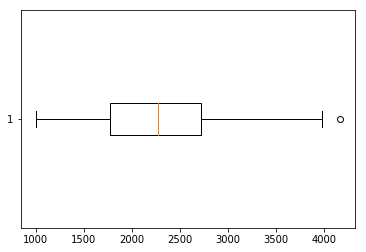

In [27]:
plt.boxplot(dftest["price_usd_per_m2"], vert = False)
plt.show()

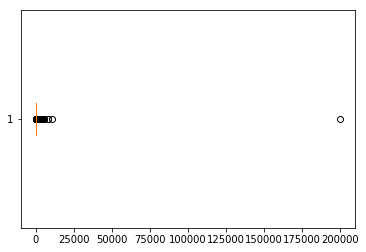

In [28]:
plt.boxplot(data["surface_total_in_m2"], vert = False)
plt.show()

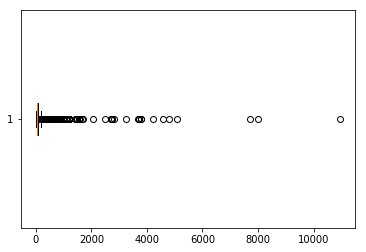

In [29]:
#data.loc[data['surface_covered_in_m2'].notnull(), 'surface_covered_in_m2'].apply(lambda x: type(x)).value_counts()
plt.boxplot(data.loc[data['surface_covered_in_m2'].notnull(), 'surface_covered_in_m2'], vert = False)
plt.show()